## Does word onset impact concreteness judgments?

The **concreteness** of a word is the "degree to which a concept denoted by that word refers to a perceptible entity" [Brysbaert et al, 2014](https://biblio.ugent.be/publication/5774089/file/5774125.pdf). Concreteness is known to correlate with word *imageability* and *age of acquisition* (the typical age at which children learn that word0.

Concreteness judgments are usually obtained in psycholinguistics experiments using a (1-7) presented to participants. 

Semantic dimensions of words, such as *concreteness*, are generally assumed to be independent of word *forms*. But [Reilly et al (2007)](https://onlinelibrary.wiley.com/doi/pdf/10.1080/03640210709336988) showed that formal properties of words, such as length and number of morphemes, correlate with concreteness judgments. A later experiment  ([Reilly et al, 2012](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0042286)) showed that English speakers are sensitive to these properties; manipulating the length, number of morphemes, etc., of nonwords systematically affected concreteness judgments among participants.

However, it is unknown whether **phonetic** or **orthographic** properties of words also correlate systematically with concreteness judgments. This exploratory analysis asks whether orthographic properties––specifically, the *onset character* of a word––are systematically predictive of concreteness.



## Read in data

In [2]:
import numpy as np
import pandas as pd 
from nlp_utilities.compling import CorpusUtilities

from src.utils import get_concreteness_for_word

In [3]:
# Set global variables
DATA_PATH = "data/raw/mrc_concreteness.csv"
CHARACTER_INDEX	= 0

In [4]:
# Get data
df = pd.read_csv(DATA_PATH, sep="\t")
df['word'] = [w.lower() for w in df.Word]
len(df['word'])

4293

In [5]:
# Rescale concreteness
df['Concreteness'] = df['Concreteness'] / 100
df.hist(column='Concreteness')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1f0ae128>]],
      dtype=object)

## Get minimal sets

In [6]:
# Get minimal sets
minimal_sets = CorpusUtilities.get_minimal_orthographic_sets(df['word'], index=CHARACTER_INDEX)

100%|██████████| 4293/4293 [01:29<00:00, 47.71it/s] 


In [82]:
len(minimal_sets)

413

In [83]:
np.mean([len(ms) for ms in minimal_sets])

3.0895883777239708

## Calculate impact on concreteness for each letter

In [84]:
letter_to_impact = []
for set_index, ms in enumerate(minimal_sets):
	letters = [w[CHARACTER_INDEX] for w in ms]
	by_word_cnc = get_concreteness_for_word(ms, df)
	mean_cnc = np.mean(by_word_cnc)
	for index, letter in enumerate(letters):
		to_add = [letter, by_word_cnc[index] - mean_cnc, mean_cnc, ms[index], set_index]
		letter_to_impact.append(to_add)


### Make dataframe

In [85]:
COLUMNS = ['letter', 'concreteness_impact', 'set_mean', 'original_word', 'set_index']
final_df = pd.DataFrame(letter_to_impact, columns=COLUMNS)

## Visualization and Analysis

Text(0,0.5,'Count')

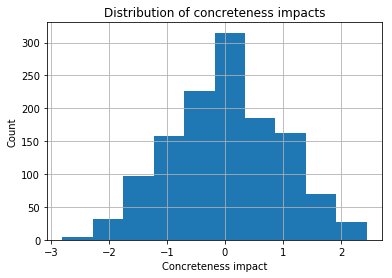

In [86]:
import matplotlib.pyplot as plt
final_df.hist(column="concreteness_impact")
plt.xlabel("Concreteness impact")
plt.title("Distribution of concreteness impacts")
plt.ylabel("Count")

In [87]:
import statsmodels.formula.api as sm

In [88]:
result = sm.ols(formula="concreteness_impact ~ letter", data=final_df).fit()

In [89]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     concreteness_impact   R-squared:                       0.032
Model:                             OLS   Adj. R-squared:                  0.014
Method:                  Least Squares   F-statistic:                     1.751
Date:                 Sun, 09 Sep 2018   Prob (F-statistic):             0.0140
Time:                         21:46:38   Log-Likelihood:                -1706.8
No. Observations:                 1276   AIC:                             3464.
Df Residuals:                     1251   BIC:                             3592.
Df Model:                           24                                         
Covariance Type:             nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.4700      0.240     -1.955      0.051      -0.942       0.002
letter[T.b]     0.6738      0.257      2.626      0.009       0.170       1.177
letter[T.c]     0.7614      0.258      2.946      0.003       0.254       1.269
letter[T.d]     0.5310      0.267      1.991      0.047       0.008       1.054
letter[T.e]     0.4763      0.346      1.377      0.169      -0.202       1.155
letter[T.f]     0.3549      0.260      1.365      0.173      -0.155       0.865
letter[T.g]     0.4002      0.271      1.479      0.140      -0.131       0.931
letter[T.h]     0.5266      0.263      2.004      0.045       0.011       1.042
letter[T.i]     0.7200      0.450      1.601      0.110      -0.162       1.602
letter[T.j]     0.3586      0.304      1.179      0.239      -0.238       0.955
letter[T.k]     0.6122      0.325      1.881      0.060      -0.026       1.251
letter[T.l]     0.4371      0.262      1.667      0.096      -0.077       0.952
letter[T.m]     0.4017      0.260      1.546      0.122      -0.108       0.911
letter[T.n]     0.2043      0.285      0.717      0.474      -0.355       0.763
letter[T.o]     0.4681      0.340      1.377      0.169      -0.199       1.135
letter[T.p]     0.6555      0.258      2.539      0.011       0.149       1.162
letter[T.q]     0.9700      0.701      1.384      0.167      -0.405       2.345
letter[T.r]     0.4543      0.262      1.736      0.083      -0.059       0.968
letter[T.s]     0.2369      0.259      0.916      0.360      -0.271       0.744
letter[T.t]     0.4791      0.259      1.849      0.065      -0.029       0.987
letter[T.u]     0.2200      0.524      0.420      0.675      -0.808       1.248
letter[T.v]     0.6514      0.312      2.089      0.037       0.040       1.263
letter[T.w]     0.2417      0.263      0.919      0.358      -0.274       0.758
letter[T.y]     0.2984      0.353      0.846      0.398      -0.394       0.991
letter[T.z]     0.4541      0.524      0.867      0.386      -0.574       1.482
==============================================================================
Omnibus:                        7.132   Durbin-Watson:                   2.489
Prob(Omnibus):                  0.028   Jarque-Bera (JB):                5.346
Skew:                          -0.011   Prob(JB):                       0.0690
Kurtosis:                       2.684   Cond. No.                         48.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [90]:
true_rsquare = result.rsquared
print("The true R^2 value is {r2}".format(r2=true_rsquare))

The true R^2 value is 0.032494240626368964


### Permutation test

How unlikely is the R^2 value we observe?

In [95]:
NUM_SHUFFLES = 1000

In [96]:
shuffled_rsquares = []
for shuffle in range(NUM_SHUFFLES):
    new_df = final_df.copy()
    new_df['shuffled_letter'] = np.random.permutation(new_df['letter'])
    new_result = sm.ols(formula="concreteness_impact ~ shuffled_letter", data=new_df).fit()
    shuffled_rsquares.append(new_result.rsquared)

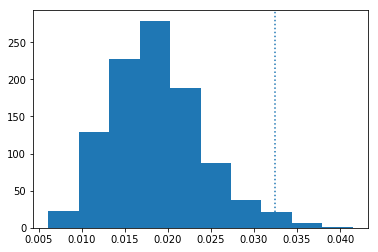

In [97]:
plt.hist(shuffled_rsquares)
plt.axvline(x=true_rsquare, linestyle="dotted")

In [98]:
p_real = len([r for r in shuffled_rsquares if r >= true_rsquare]) / len(shuffled_rsquares)
print("p={p}".format(p=p_real))

p=0.017


## Visualization

In [99]:
import seaborn as sn

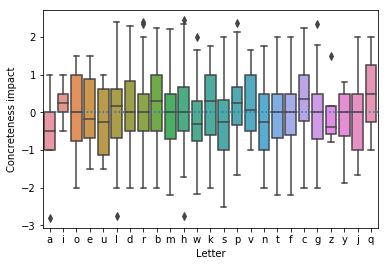

In [100]:
ax = sn.boxplot(data=final_df, x="letter", y="concreteness_impact")
ax.set(xlabel="Letter", ylabel="Concreteness impact")
ax.axhline(y=0, linestyle="dotted")

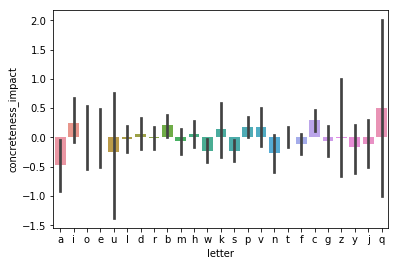

In [101]:
ax = sn.barplot(data=final_df, x="letter", y="concreteness_impact")

In [102]:
final_df['is_vowel'] = final_df['letter'].apply(lambda x: x in ["a", "e", "i", "o", "u", "y"])

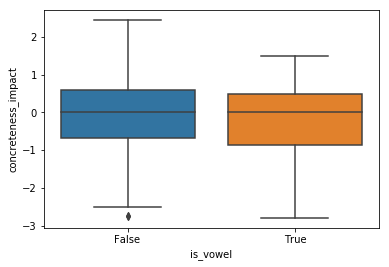

In [103]:
sn.boxplot(data=final_df, x="is_vowel", y="concreteness_impact")

## Saving processed data

In [104]:
final_df.to_csv("data/processed/concreteness_impacts.csv")